# Exercício avaliativo - Redes Mundo Pequeno
## Introdução a Física Estatística e Computacional

Luís Felipe Ramos Ferreira - 2019022553

Igor Lacerda Faria da Silva - 2020041973

Gabriel Rocha Martins - 2019006639

In [1]:
"""Atividade 5: Redes Complexas."""

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import rustworkx as rx

In [2]:
L = 1000
Z = 2
P = 2
IMG_PATH = "images/"

In [3]:
def generate_matrix(size: int, z: int, p: float):
    """Gera uma matriz de adjacência de um grafo de Watts-Strogatz."""
    matrix_adj = np.zeros((size, size))
    for i in np.arange(size):
        for j in np.arange(z // 2):
            matrix_adj[i][(i + j + 1) % size] = 1
    num_connections = int(p * size * z / 2)
    pairs = np.random.randint(
        low=0,
        high=size,
        size=(num_connections, 2),
    )
    for i, j in pairs:
        matrix_adj[i][j] = 1
    return matrix_adj

In [4]:
def plot_bins(grx: rx.PyGraph):
    """Imprime o histograma das distâncias entre os nós do grafo."""
    distances = rx.distance_matrix(grx).astype(int)
    distances_flattened = np.bincount(np.reshape(distances, distances.size))
    dist_range = np.arange(distances_flattened.size)
    # Nós dividimos por 2 pois a matriz de distâncias é simétrica
    plt.bar(dist_range, distances_flattened / 2)
    plt.xticks(dist_range)
    plt.title("Distruibuição das distâncias entre os nós do grafo")
    plt.xlabel("Distância")
    plt.ylabel("Número de ocorrências")

In [5]:
def gen_plot_save(size: int, neighbors: int, prob: float):
    """Gera e salva as imagens do grafo e do histograma."""
    adj_matrix = generate_matrix(size, neighbors, prob)
    graph = nx.Graph(adj_matrix)
    nx.draw_circular(graph)
    plt.savefig(f"{IMG_PATH}Graph L={size} Z={neighbors} P={prob}.png")
    plt.show()
    graph_rx = rx.networkx_converter(graph)
    plot_bins(graph_rx)
    plt.savefig(f"{IMG_PATH}Bins L={size} Z={neighbors} P={prob}.png")

In [6]:
def gen_plot_bins(size: int, neighbors: int, prob: float):
    """Gera e plota o histograma das distâncias entre os nós do grafo, mas não salve."""
    adj_matrix = generate_matrix(size, neighbors, prob)
    graph = nx.Graph(adj_matrix)
    graph_rx = rx.networkx_converter(graph)
    plot_bins(graph_rx)

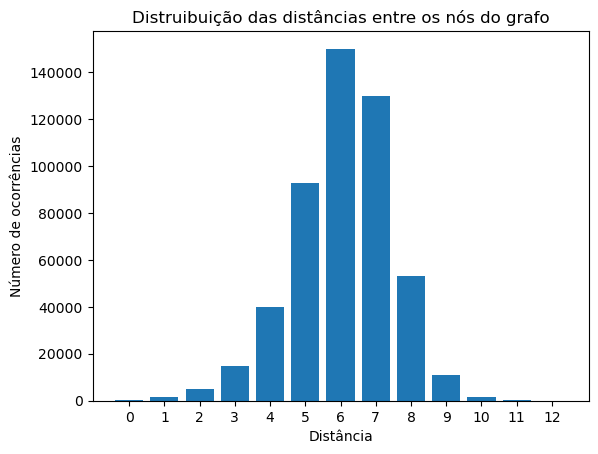

In [7]:
gen_plot_bins(1000, 2, 0.75)

### Amplie o histograma; o quanto ele muda com p? Que valor de p você precisaria para obter “seis graus de separação”?

Conforme o valor de $p$ aumenta, mais arestas são adicionadas ao grafo, o que, em média, diminui as distâncias entre os vértices. Dessa maneira, o ponto médio do histograma se aproxima de valores cada vez menores até atingir o seu mínimo: um grafo completo, em que a menor distância entre quaisquer 2 vértices é 1 (estamos desconsiderando o caso em que um vértice está ligado em si mesmo).

Não existe um valor de $p$ que garante os "seis graus de separação", uma vez que o modelo é probabílistico. No entanto, em nosso experimentos, avaliamos empiricamente que um valor próximo de $p=0.75$ muitas vezes produzia grafos de modo que a média de distância entre os vértices era 6. Portanto, parece um valor seguro para termos os 6 graus de separação no grafo com os parâmetros propostos.

In [8]:
def gen_avg_dist(size: int, neighbors: int, prob: float, plot: bool = False):
    """Gera um grafo e retorna a média das distâncias entre os nós."""
    adj_matrix = generate_matrix(size, neighbors, prob)
    graph = nx.Graph(adj_matrix)
    if plot:
        nx.draw_circular(graph, with_labels=False)
    graph_rx = rx.networkx_converter(graph)
    distances = rx.distance_matrix(graph_rx).astype(int)
    return np.mean(distances)

9.70310022

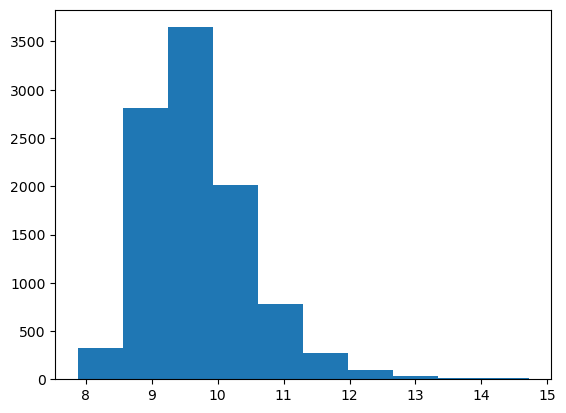

In [9]:
my_list = np.zeros(10000)
for i in range(my_list.size):
    my_list[i] = gen_avg_dist(size=100, neighbors=2, prob=0.1)
plt.hist(my_list)
my_list.mean()

8.95

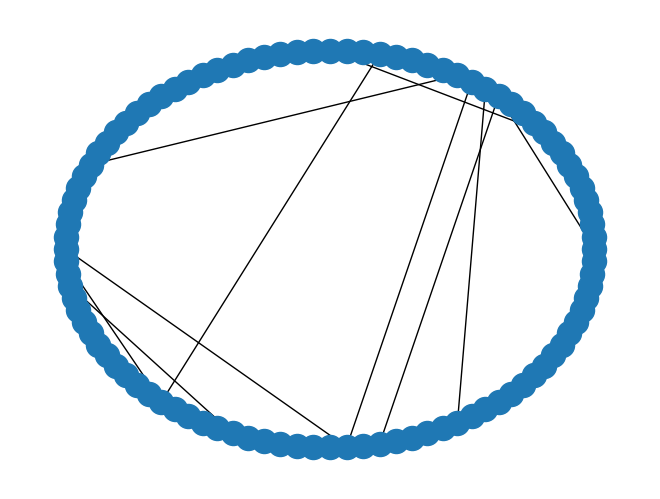

In [10]:
gen_avg_dist(size=100, neighbors=2, prob=0.1, plot=True)

### Aproximadamente quantas arestas longas existem neste sistema? Você esperaria flutuações nas distâncias?

Podemos ver pelo plot do histograma que, conforme especifado no enunciado, a média das distâncias para os pares de nós está próxima de 10. A cima, podemos ver uma das redes de mundo pequeno geradas em nossos experimentos da questão. A olho nu, podemos contar 8 arestas longas (isto é, arestas inseridas aleatoriamente). A variância é considerável pois a rede é gerada de maneira aleatória, e portanto, cada vez que executamos o código, obtemos um resultado diferente.

In [11]:
def add_edges(graph: nx.Graph, size: int, z: int, p: float):
    """Adiciona n arestas aleatórias ao grafo com probabilidade p."""
    graph_copy = graph.copy()
    num_connections = int(p * size * z / 2)
    pairs = np.random.randint(
        low=0,
        high=size,
        size=(num_connections, 2),
    )
    for i, j in pairs:
        graph_copy.add_edge(i, j)
    return graph_copy

In [12]:
def plot_var_prob(size: int, neighbors: int, padding: int):
    """Plota a variância da distância média em função de p."""
    adj_matrix_default = generate_matrix(size, neighbors, 0)
    graph = nx.Graph(adj_matrix_default)
    graph_rx = rx.networkx_converter(graph)
    dist_default = np.mean(rx.distance_matrix(graph_rx))
    mean_distances = np.zeros(padding)
    space = np.logspace(-3, 3, padding)
    for idx, val in np.ndenumerate(space):
        g_aux = add_edges(graph, size, neighbors, val)
        grx_aux = rx.networkx_converter(g_aux)
        dist = np.mean(rx.distance_matrix(grx_aux))
        normal_dist = dist / dist_default
        mean_distances[idx[0]] = normal_dist
    plt.semilogx(space, mean_distances)
    plt.title("Distância média normalizada em função de p")
    plt.xlabel("p")
    plt.ylabel("Distância média normalizada")

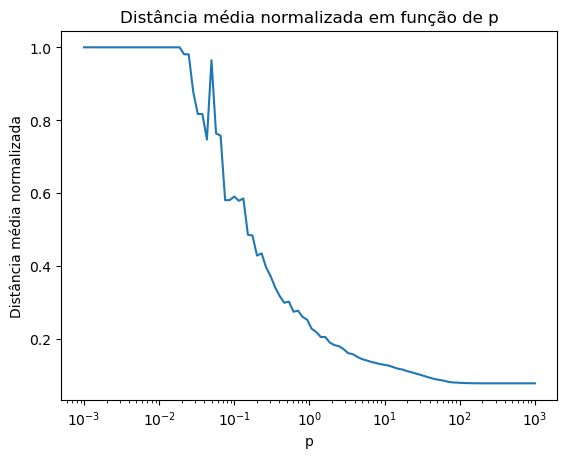

In [13]:
plot_var_prob(50, 2, 100)

### Por que o gráfico é fixado em 1 para p pequeno?

O gráfico é fixado em 1, para p pequeno, pois a "chance" de se gerar novas arestas é muito pequena. Isto é, segundo especificado, o número de novas arestas propostas para a rede é muito pequeno, ocorrendo em casos que nenhuma é adicionada, ou então pouquíssimas são adicionadas, o que não impacta na medição das distâncias médias.

In [14]:
def gen_plot_draw(size: int, neighbors: int, prob: float):
    """Gera e plota o histograma das distâncias entre os nós do grafo, mas não salve."""
    adj_matrix = generate_matrix(size, neighbors, prob)
    graph = nx.Graph(adj_matrix)
    nx.draw_circular(graph)

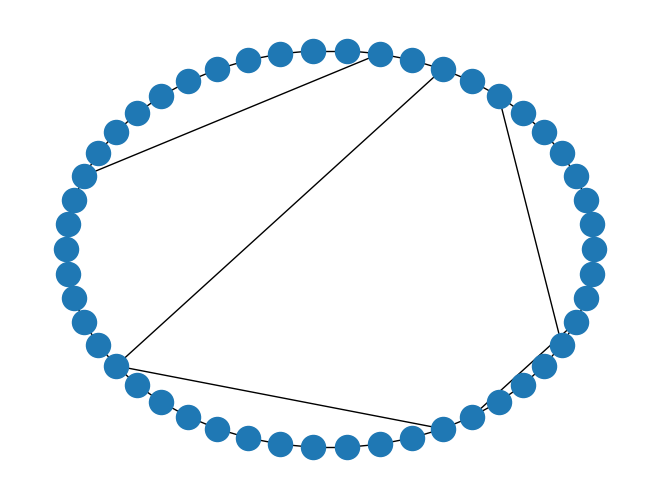

In [15]:
gen_plot_draw(50, 2, 0.1)

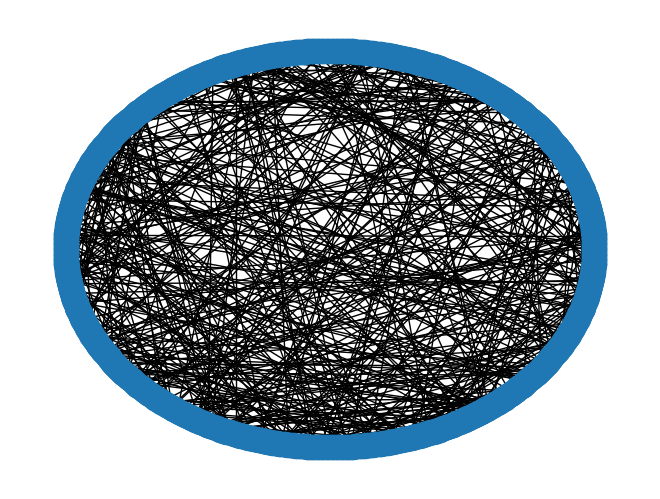

In [16]:
x = nx.watts_strogatz_graph(1000, 10, 0.1)
nx.draw_circular(x)

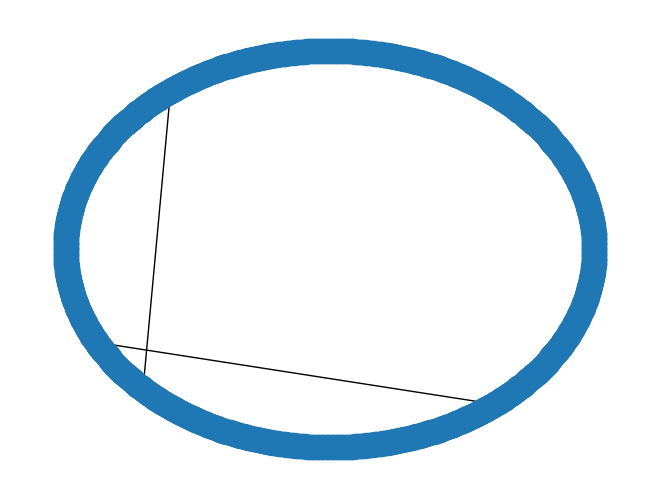

In [17]:
x = nx.watts_strogatz_graph(1000, 10, 0.001)
nx.draw_circular(x)

### Qual dos sistemas deles parece estatisticamente mais semelhante ao seu?

O segundo gráfico, com $p=0.001$, uma vez que apresenta uma quantidade de arestas adicionais/longas mais semelhante ao nosso.

In [18]:
def mean_distances(size: int, neighbors: int, padding: int):
    """Plota a variância da distância média em função de p."""
    adj_matrix_default = generate_matrix(size, neighbors, 0)
    graph = nx.Graph(adj_matrix_default)
    graph_rx = rx.networkx_converter(graph)
    dist_default = np.mean(rx.distance_matrix(graph_rx))
    mean_distances = np.zeros(padding)
    space = np.logspace(-3, 3, padding)
    for idx, val in np.ndenumerate(space):
        g_aux = add_edges(graph, size, neighbors, val)
        grx_aux = rx.networkx_converter(g_aux)
        dist = np.mean(rx.distance_matrix(grx_aux))
        normal_dist = dist / dist_default
        mean_distances[idx[0]] = normal_dist
    return mean_distances

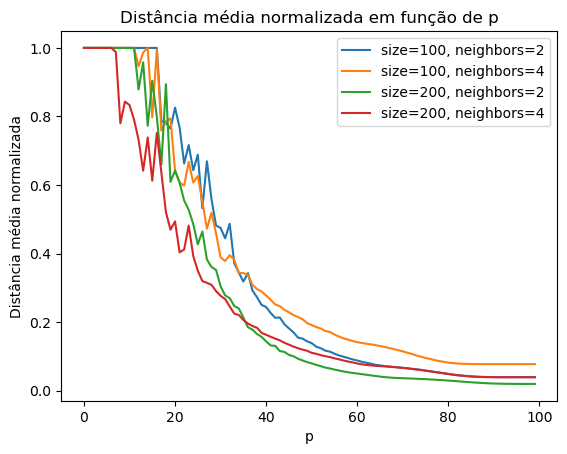

In [19]:
for size in [100, 200]:
    for neighbors in [2, 4]:
        plt.plot(
            mean_distances(size, neighbors, 100),
            label=f"size={size}, neighbors={neighbors}",
        )
plt.title("Distância média normalizada em função de p")
plt.xlabel("p")
plt.ylabel("Distância média normalizada")
plt.legend()
plt.show()

### Redes reais. Procure por uma rede real e encontre a distância média e o histograma das distâncias entre os nós.

Escolhemos o conjunto de dados *soc-advogatos*, por ter se mostrado uma base fácil de manipular e analiar. Abaixo, podemos ver o histograma gerado para as distâncias, assim como o valor média para elas.

In [20]:
real_data = pd.read_csv(
    "data/soc-advogato.edges",
    sep=" ",
    header=3,
    names=["origin", "destiny", "weight"],
)

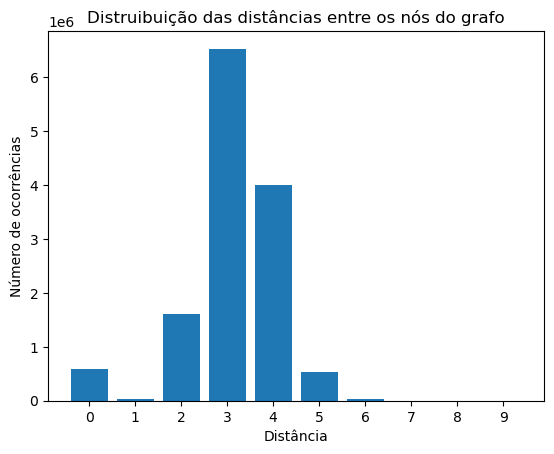

In [21]:
real_network = nx.Graph()
for _, row in real_data.iterrows():
    if row.origin != row.destiny:
        real_network.add_edge(row.origin, row.destiny)
real_network_rx = rx.networkx_converter(real_network)

plot_bins(real_network_rx)

In [22]:
np.mean(rx.distance_matrix(real_network_rx))

3.1329207339201988